In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
raw_data = pd.read_csv("Global_Superstore2.csv",encoding="latin-1")

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [16]:
raw_data['Order ID'].nunique()

25035

In [7]:
raw_data['Customer Name'].nunique()

795

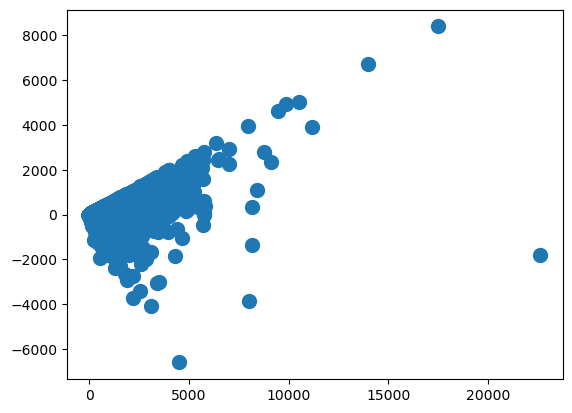

In [14]:
plt.scatter(raw_data['Sales'],raw_data['Profit'],s=100)

In [17]:
# Assuming your DataFrame is named 'raw_data'
duplicates = raw_data[raw_data.duplicated('Order ID', keep=False)]

# 'duplicates' now contains rows with duplicate values in the 'Order ID' column
duplicates_sorted = duplicates.sort_values('Order ID')


In [21]:
subset = raw_data[['Sales','Quantity','Discount','Profit','Shipping Cost']]

In [54]:
subset.head()

,Sales,Quantity,Discount,Profit,Shipping Cost
0,2309.650,7,0.0,762.1845,933.57
1,3709.395,9,0.1,-288.7650,923.63
2,5175.171,9,0.1,919.9710,915.49
3,2892.510,5,0.1,-96.5400,910.16
4,2832.960,8,0.0,311.5200,903.04


In [55]:
subset_data = subset.sample(frac=0.01,random_state=42)

In [56]:
subset_data.head()

,Sales,Quantity,Discount,Profit,Shipping Cost
49728,5.868,3,0.4,-1.2720,0.41
45547,10.368,2,0.2,3.6288,1.14
15664,269.220,2,0.0,126.4800,18.52
40561,43.176,3,0.2,4.3176,2.12
49426,5.712,1,0.4,-0.7680,0.48


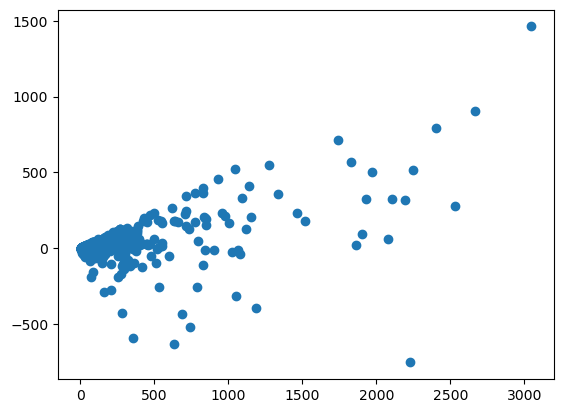

In [57]:
plt.scatter(subset_data['Sales'],subset_data['Profit'])

In [44]:
from sklearn.preprocessing import MinMaxScaler
# from copy import copy

In [58]:
scaler = MinMaxScaler()
scaler.fit_transform(subset_data)

array([[0.00148483, 0.15384615, 0.5       , 0.33963823, 0.00069172],
       [0.00296179, 0.07692308, 0.25      , 0.3418483 , 0.0022219 ],
       [0.08792027, 0.07692308, 0.        , 0.39724945, 0.03865261],
       ...,
       [0.0277786 , 0.        , 0.        , 0.350293  , 0.0142956 ],
       [0.12456848, 0.15384615, 0.        , 0.38656166, 0.18517199],
       [0.04112372, 0.23076923, 0.        , 0.36532138, 0.03299306]])

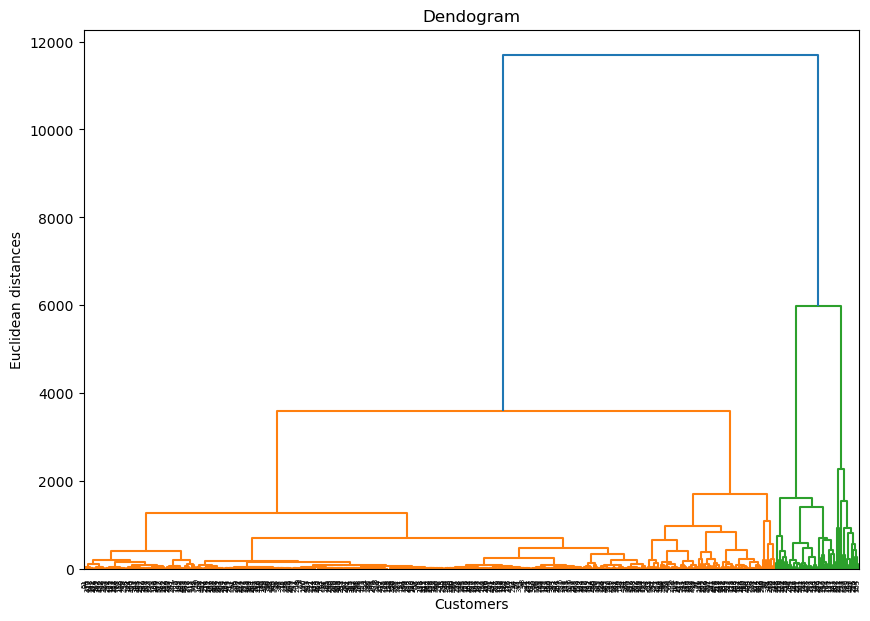

In [60]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(subset_data, method='ward'))
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [82]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')  
cluster.fit_predict(subset_data)

array([3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 1, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 0, 3, 3,
       3, 3, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 2, 1, 3, 3, 3, 0, 3, 3,
       3, 3, 3, 3, 1, 3, 2, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       1, 3, 3, 2, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 3, 3, 1, 3, 3, 2, 1, 1, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2,
       3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 0, 3, 1, 3, 1, 3, 1, 2, 2, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 1, 3, 2, 1, 3, 3, 3, 1, 0, 3, 3, 3, 3, 1, 3, 2, 3, 3, 0, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 0, 3, 0, 2, 3, 3, 1, 3,

In [83]:
cl = cluster.fit_predict(subset_data)

In [65]:
from sklearn.metrics import silhouette_score

In [84]:
silhouette_score(subset_data,cl)

0.6469587021487763

In [85]:
subset_data['Clusters'] = cl

In [86]:
subset_data.head()

,Sales,Quantity,Discount,Profit,Shipping Cost,Clusters
49728,5.868,3,0.4,-1.2720,0.41,3
45547,10.368,2,0.2,3.6288,1.14,3
15664,269.220,2,0.0,126.4800,18.52,1
40561,43.176,3,0.2,4.3176,2.12,3
49426,5.712,1,0.4,-0.7680,0.48,3


Text(0, 0.5, 'Profit')

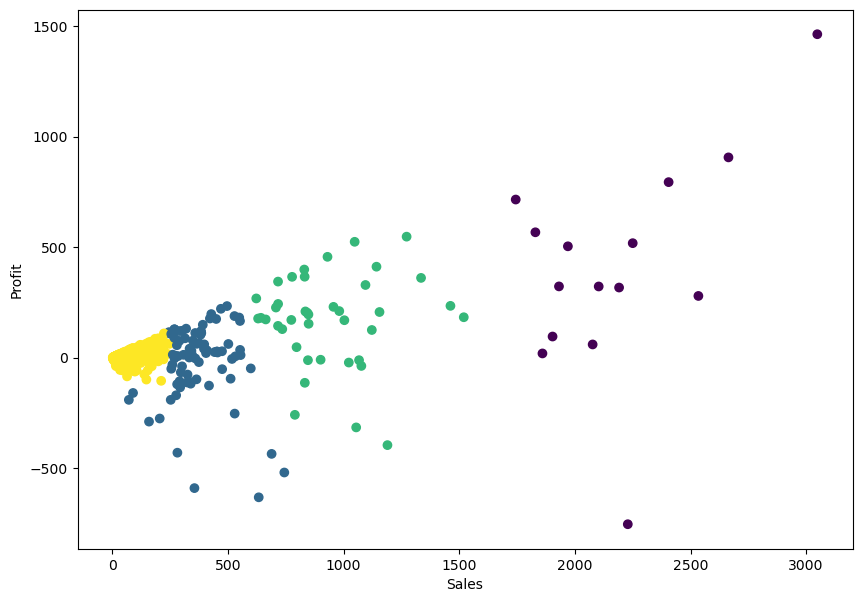

In [88]:
plt.figure(figsize=(10, 7))  
plt.scatter(subset_data['Sales'],subset_data['Profit'],c=subset_data['Clusters'],cmap='viridis')
plt.xlabel("Sales")
plt.ylabel("Profit")

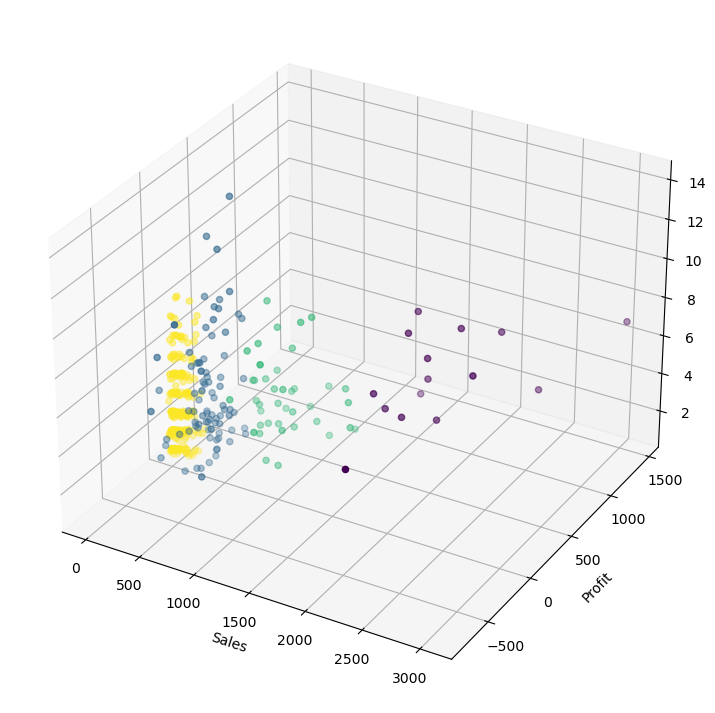

In [90]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(subset_data['Sales'], subset_data['Profit'], subset_data['Quantity'], c=subset_data['Clusters'], cmap='viridis')
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
ax.set_zlabel('Quantity', labelpad=25) 

plt.show()

In [92]:
c0 = subset_data[subset_data['Clusters'] == 0]
c1 = subset_data[subset_data['Clusters'] == 1]
c2 = subset_data[subset_data['Clusters'] == 2]
c3 = subset_data[subset_data['Clusters'] == 3]

In [93]:
print(c0.shape,c1.shape,c2.shape,c3.shape)

(15, 6) (85, 6) (40, 6) (373, 6)


In [94]:
subset_data1 = subset_data.copy(deep=True)

In [100]:
subset_data1.drop('Clusters',axis=1,inplace=True)

In [101]:
subset_data1.head()

,Sales,Quantity,Discount,Profit,Shipping Cost
49728,5.868,3,0.4,-1.2720,0.41
45547,10.368,2,0.2,3.6288,1.14
15664,269.220,2,0.0,126.4800,18.52
40561,43.176,3,0.2,4.3176,2.12
49426,5.712,1,0.4,-0.7680,0.48


In [103]:
from sklearn.cluster import KMeans

In [104]:
# Apply K-means algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
subset_data1['Clusters'] = kmeans.fit_predict(subset_data1)

C:\Users\91914\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91914\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [105]:
subset_data1.head()

,Sales,Quantity,Discount,Profit,Shipping Cost,Clusters
49728,5.868,3,0.4,-1.2720,0.41,0
45547,10.368,2,0.2,3.6288,1.14,0
15664,269.220,2,0.0,126.4800,18.52,3
40561,43.176,3,0.2,4.3176,2.12,0
49426,5.712,1,0.4,-0.7680,0.48,0


In [106]:
silhouette_score(subset_data1,subset_data1['Clusters'])

0.6472247842104798

Text(0, 0.5, 'Profit')

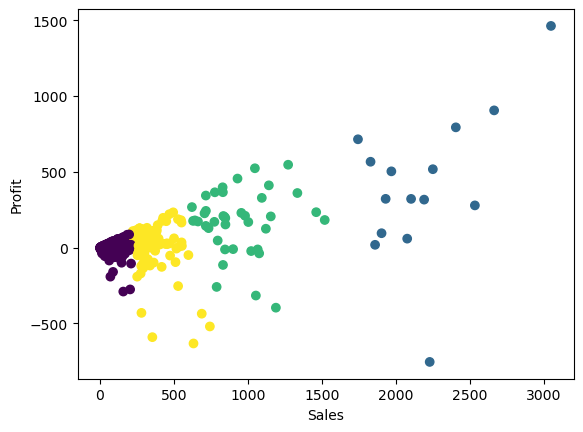

In [107]:
  
plt.scatter(subset_data1['Sales'],subset_data1['Profit'],c=subset_data1['Clusters'],cmap='viridis')
plt.xlabel("Sales")
plt.ylabel("Profit")

In [108]:
c0_ = subset_data1[subset_data1['Clusters'] == 0]
c1_ = subset_data1[subset_data1['Clusters'] == 1]
c2_ = subset_data1[subset_data1['Clusters'] == 2]
c3_ = subset_data1[subset_data1['Clusters'] == 3]

In [109]:
print(c0_.shape,c1_.shape,c2_.shape,c3_.shape)

(369, 6) (15, 6) (40, 6) (89, 6)
